# Homework 1: Classification


## Set Up
StudentsPerformance.csv describes the performance of students from a school, all belonging to the same batch.<br>
 The dataset consists of 10 attributes (columns) for each student and contains 1000 sample students (rows).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Student Performance.csv to Student Performance (1).csv


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!git clone https://github.com/stefmolin/ml-utils.git

fatal: destination path 'ml-utils' already exists and is not an empty directory.


In [ ]:
%cd /content/
!pip install -e ml-utils

/content
Obtaining file:///content/ml-utils
  Attempting uninstall: ml-utils
    Found existing installation: ml-utils 0.2.0
    Can't uninstall 'ml-utils'. No files were found to uninstall.
  Running setup.py develop for ml-utils


##  EDA

In [ ]:
student_performance_df = pd.read_csv('Student Performance.csv')

In [ ]:
student_performance_df.shape

(1000, 10)

In [ ]:
student_performance_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,total score,test preparation course,admission prospect
0,female,group B,bachelor's degree,standard,72,72,74,218,none,medium
1,female,group C,some college,standard,69,90,88,247,completed,high
2,female,group B,master's degree,standard,90,95,93,278,none,high
3,male,group A,associate's degree,free/reduced,47,57,44,148,none,low
4,male,group C,some college,standard,76,78,75,229,none,high


### check missing values

In [ ]:
student_performance_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
math score                     0
reading score                  0
writing score                  0
total score                    0
test preparation course        0
admission prospect             0
dtype: int64

### descriptive statistics

In [ ]:
# summary statistics of continuous variables
student_performance_sum = student_performance_df.agg(
    {
        "math score": ["min", "max", "mean","median", "std"],
        "reading score": ["min", "max", "mean","median", "std"],
        "writing score": ["min", "max", "mean","median", "std"],
        "total score" : ["min", "max", "mean","median", "std"]
    }
)
student_performance_sum

,math score,reading score,writing score,total score
min,0.00000,17.000000,10.000000,27.000000
max,100.00000,100.000000,100.000000,300.000000
mean,66.08900,69.169000,68.054000,203.312000
median,66.00000,70.000000,69.000000,205.000000
std,15.16308,14.600192,15.195657,42.771978


In [ ]:
# summary statistics of categorical variables
def sum_categorical(var):
  return student_performance_df[var].value_counts(), student_performance_df[var].value_counts(normalize=True)

In [ ]:
sum_categorical('gender')

(female    518
 male      482
 Name: gender, dtype: int64, female    0.518
 male      0.482
 Name: gender, dtype: float64)

In [ ]:
sum_categorical('race/ethnicity')

(group C    319
 group D    262
 group B    190
 group E    140
 group A     89
 Name: race/ethnicity, dtype: int64, group C    0.319
 group D    0.262
 group B    0.190
 group E    0.140
 group A    0.089
 Name: race/ethnicity, dtype: float64)

In [ ]:
sum_categorical('parental level of education')

(some college          226
 associate's degree    222
 high school           196
 some high school      179
 bachelor's degree     118
 master's degree        59
 Name: parental level of education, dtype: int64, some college          0.226
 associate's degree    0.222
 high school           0.196
 some high school      0.179
 bachelor's degree     0.118
 master's degree       0.059
 Name: parental level of education, dtype: float64)

In [ ]:
sum_categorical('lunch')

(standard        645
 free/reduced    355
 Name: lunch, dtype: int64, standard        0.645
 free/reduced    0.355
 Name: lunch, dtype: float64)

In [ ]:
sum_categorical('test preparation course')

(none         642
 completed    358
 Name: test preparation course, dtype: int64, none         0.642
 completed    0.358
 Name: test preparation course, dtype: float64)

In [ ]:
sum_categorical('admission prospect')

(medium    475
 high      356
 low       169
 Name: admission prospect, dtype: int64, medium    0.475
 high      0.356
 low       0.169
 Name: admission prospect, dtype: float64)

### data preprocessing 

Logistic regression models can only work with numerical values.   
Therefore, you will have to convert the data into numerical values before training the models. 

In [ ]:
student_performance_df['gender'].replace({'female':0, 'male':1},inplace=True)
student_performance_df['race/ethnicity'].replace({'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5},inplace=True)
student_performance_df['parental level of education'].replace({"some high school":1, "high school":1, "associate's degree":2, "some college":3, "bachelor's degree":3, "master's degree":4},inplace=True)
student_performance_df['lunch'].replace({'free/reduced':0, 'standard':1},inplace=True)
student_performance_df['test preparation course'].replace({'none':0, 'completed':1},inplace=True)
student_performance_df['admission prospect'].replace({'low':1, 'medium':2, 'high':3},inplace=True)

### Visualization


#### bar plot

Text(0, 0.5, 'admission prospect')

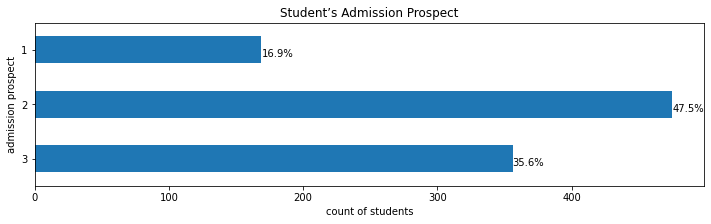

In [ ]:
ax = student_performance_df['admission prospect'].value_counts().sort_index(
    ascending=False
).plot.barh(title='Student’s Admission Prospect', figsize=(12, 3))
for bar in ax.patches:
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/4, 
        f'{bar.get_width()/student_performance_df.shape[0]:.1%}'
    )
plt.xlabel('count of students')
plt.ylabel('admission prospect')

#### Pairplot

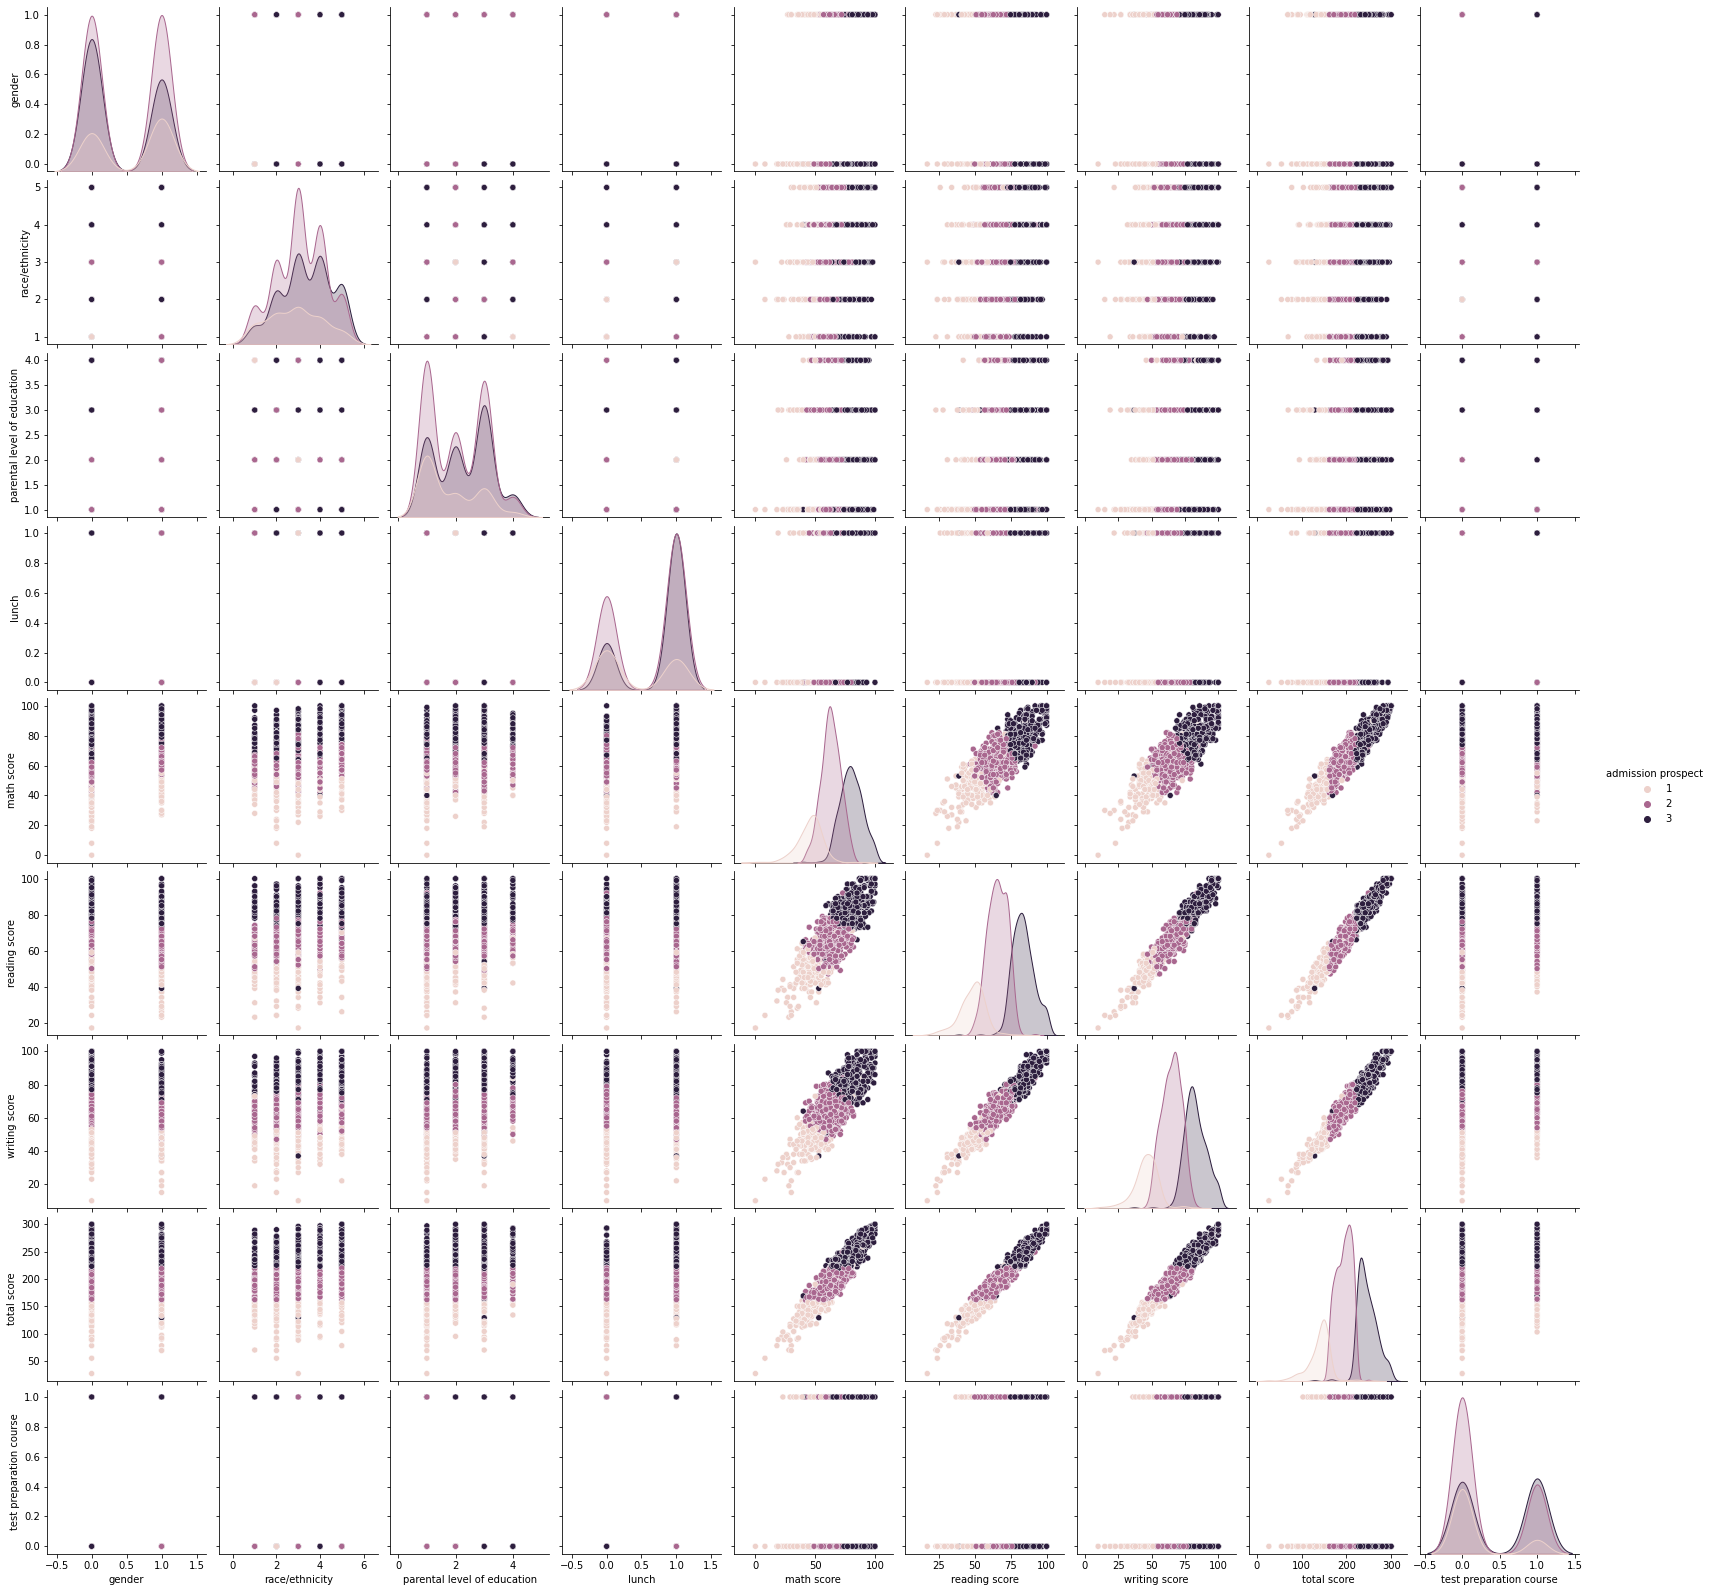

In [ ]:
pairplot = sns.pairplot(student_performance_df, hue='admission prospect')

In [ ]:
pairplot.figure.savefig("pairplot.png")

## Model & Evaluation

### Model 1
*gender/race/parental education*

In [ ]:
student_performance_1 = student_performance_df[["gender", "race/ethnicity", "parental level of education", "admission prospect"]]

#### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 1
student_performance_y_1 = student_performance_1.pop('admission prospect')
student_performance_X_1 = student_performance_1

# 2
r_X_train_1, r_X_test_1, r_y_train_1, r_y_test_1 = train_test_split(
    student_performance_X_1, student_performance_y_1, test_size=0.3, random_state=0, stratify=student_performance_y_1
)

In [ ]:
student_performance_y_1.value_counts(normalize=True)

2    0.475
3    0.356
1    0.169
Name: admission prospect, dtype: float64

In [ ]:
r_y_train_1.value_counts(normalize=True)

2    0.475714
3    0.355714
1    0.168571
Name: admission prospect, dtype: float64

In [ ]:
r_y_test_1.value_counts(normalize=True)

2    0.473333
3    0.356667
1    0.170000
Name: admission prospect, dtype: float64

In [ ]:
# 3
student_admission_lr_1 = Pipeline([
    ('lr', LogisticRegression(
        solver='lbfgs', class_weight='balanced', random_state=0
    ))
])

In [ ]:
# 4
student_admission_lr_1.fit(r_X_train_1, r_y_train_1)

Pipeline(steps=[('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
# 5
admission_preds_1 = student_admission_lr_1.predict(r_X_test_1)

#### Evaluation

/content/ml-utils


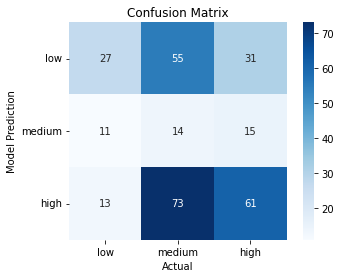

In [ ]:
%cd /content/ml-utils/
from ml_utils.classification import confusion_matrix_visual
confusion_matrix_visual(r_y_test_1, admission_preds_1, ['low', 'medium', 'high'])

In [ ]:
# mean accuracy
student_admission_lr_1.score(r_X_test_1, r_y_test_1)

0.34

### Model 2
*math score/reading score/writing score/total score/test preparationn course*

In [ ]:
student_performance_2 = student_performance_df[["math score", "reading score", "writing score", "total score", "test preparation course", "admission prospect"]]

#### Logistic Regression

In [ ]:
# 1
student_performance_y_2 = student_performance_2.pop('admission prospect')
student_performance_X_2 = student_performance_2

# 2
r_X_train_2, r_X_test_2, r_y_train_2, r_y_test_2 = train_test_split(
    student_performance_X_2, student_performance_y_2, test_size=0.3, random_state=0, stratify=student_performance_y_2
)

In [ ]:
student_performance_y_2.value_counts(normalize=True)

2    0.475
3    0.356
1    0.169
Name: admission prospect, dtype: float64

In [ ]:
r_y_train_2.value_counts(normalize=True)

2    0.475714
3    0.355714
1    0.168571
Name: admission prospect, dtype: float64

In [ ]:
r_y_test_2.value_counts(normalize=True)

2    0.473333
3    0.356667
1    0.170000
Name: admission prospect, dtype: float64

In [ ]:
# 3
student_admission_lr_2 = Pipeline([
    ('lr', LogisticRegression(
        solver='lbfgs', class_weight='balanced', random_state=0
    ))
])

In [ ]:
# 4
student_admission_lr_2.fit(r_X_train_2, r_y_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
# 5
admission_preds_2 = student_admission_lr_2.predict(r_X_test_2)

#### Evaluation

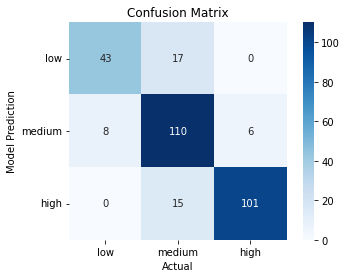

In [ ]:
confusion_matrix_visual(r_y_test_2, admission_preds_2, ['low', 'medium', 'high'])

In [ ]:
# mean accuracy
student_admission_lr_2.score(r_X_test_2, r_y_test_2)

0.8466666666666667

### Model 3
*all columns except lunch*

#### Logistic Regression

In [ ]:
student_performance_3 = student_performance_df.drop("lunch", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
# 1
student_performance_y_3 = student_performance_3.pop('admission prospect')
student_performance_X_3 = student_performance_3

# 2
r_X_train_3, r_X_test_3, r_y_train_3, r_y_test_3 = train_test_split(
    student_performance_X_3, student_performance_y_3, test_size=0.3, random_state=0, stratify=student_performance_y_3
)

In [ ]:
student_performance_y_3.value_counts(normalize=True)

2    0.475
3    0.356
1    0.169
Name: admission prospect, dtype: float64

In [ ]:
r_y_train_3.value_counts(normalize=True)

2    0.475714
3    0.355714
1    0.168571
Name: admission prospect, dtype: float64

In [ ]:
r_y_test_3.value_counts(normalize=True)

2    0.473333
3    0.356667
1    0.170000
Name: admission prospect, dtype: float64

In [ ]:
# 3
student_admission_lr_3 = Pipeline([
    ('lr', LogisticRegression(
        solver='lbfgs', class_weight='balanced', random_state=0
    ))
])

In [ ]:
# 4
student_admission_lr_3.fit(r_X_train_3, r_y_train_3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
# 5
admission_preds_3 = student_admission_lr_3.predict(r_X_test_3)

#### Evaluation

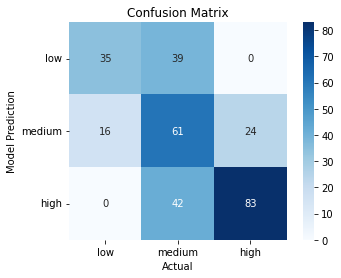

In [ ]:
confusion_matrix_visual(r_y_test_3, admission_preds_3, ['low', 'medium', 'high'])

In [ ]:
# mean accuracy
student_admission_lr_3.score(r_X_test_3, r_y_test_3)

0.5966666666666667